In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from utils import utils, config

In [2]:
df, df_cv = utils.Utils.load_data(drop_neutral=False)

In [3]:
nltk_rf_w2v_model_1 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=False, remove_urls=False)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_w2v_svc_1"
)

In [4]:
# nltk_rf_w2v_model_1.fit(False)
# nltk_rf_w2v_model_1.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  14.2s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   1.5s
Classification Report for nltk_w2v_svc_1 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.72      0.90      0.80       123
     neutral       0.78      0.82      0.80       171
    positive       0.87      0.70      0.78       196

    accuracy                           0.79       490
   macro avg       0.79      0.81      0.79       490
weighted avg       0.80      0.79      0.79       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.40      0.38      0.39       348
     neutral       0.42      0.55      0.47       424
    positive       0.52      0.42      0.47       528

    accuracy                           0.45      1300
   macro avg       0.45      0.45      0.44      1300
we

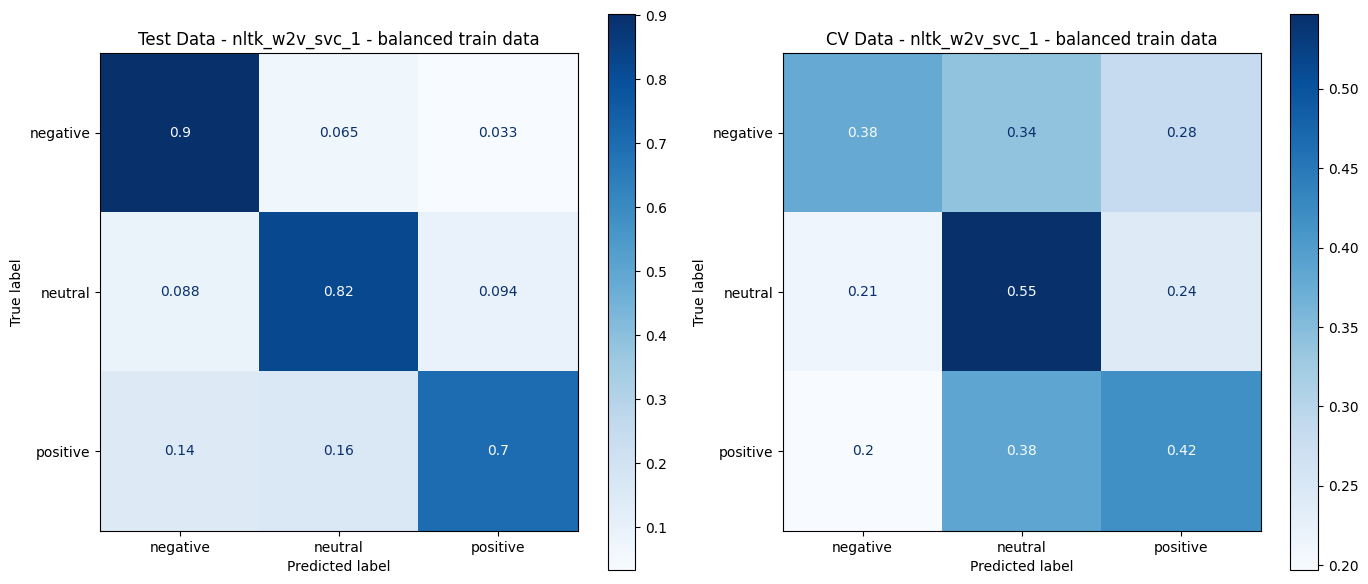

In [5]:
nltk_rf_w2v_model_1.fit(True)
nltk_rf_w2v_model_1.evaluate(True)

In [6]:
nltk_rf_w2v_model_1.dump(config.MODEL_DIR)

In [7]:
nltk_rf_w2v_model_2 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=True, lemmatize=False, remove_urls=True)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_w2v_svc_2"
)

In [8]:
# nltk_rf_w2v_model_2.fit(False)
# nltk_rf_w2v_model_2.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  19.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.0s
Classification Report for nltk_w2v_svc_2 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.70      0.91      0.79       123
     neutral       0.80      0.78      0.79       171
    positive       0.87      0.72      0.79       196

    accuracy                           0.79       490
   macro avg       0.79      0.80      0.79       490
weighted avg       0.80      0.79      0.79       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.36      0.36      0.36       348
     neutral       0.39      0.63      0.48       424
    positive       0.48      0.23      0.31       528

    accuracy                           0.40      1300
   macro avg       0.41      0.41      0.38      1300
we

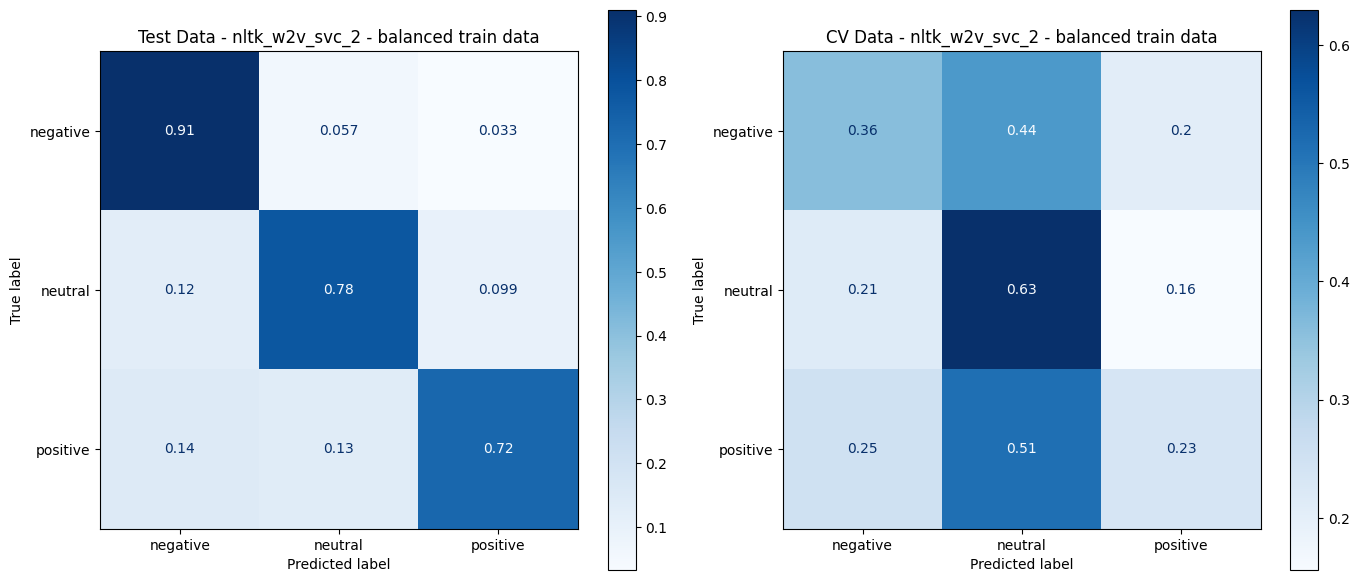

In [9]:
nltk_rf_w2v_model_2.fit(True)
nltk_rf_w2v_model_2.evaluate(True)

In [10]:
nltk_rf_w2v_model_3 = utils.CustomPipeline(
    df,
    config.FEATURES,
    config.TARGET, 
    df_cv=df_cv,
    steps=[
        ("preprocessor", ColumnTransformer(
            transformers=[
                (f'nltk_{feature}', Pipeline([
                    ('compound_splitter', utils.CompoundWordSplitter()),
                    ('tokenizer', utils.NLTKTokenizer(extra_stop_words=False, lemmatize=True, remove_urls=True)),
                    ('word2vec', utils.Word2VecTransformer())
                ]), feature) for feature in config.FEATURES]
        )),
        ("classifier", SVC(random_state=config.RANDOM_STATE))
    ],
    model_name="nltk_w2v_svc_3"
)

In [11]:
# nltk_rf_w2v_model_3.fit(False)
# nltk_rf_w2v_model_3.evaluate(False)

[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=  40.5s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   2.1s
Classification Report for nltk_w2v_svc_3 - balanced train data:
Classification Report - Validation set
               precision    recall  f1-score   support

    negative       0.71      0.89      0.79       123
     neutral       0.79      0.78      0.79       171
    positive       0.88      0.74      0.81       196

    accuracy                           0.80       490
   macro avg       0.79      0.81      0.80       490
weighted avg       0.81      0.80      0.80       490

Classification Report - Crossvalidation set
               precision    recall  f1-score   support

    negative       0.31      0.31      0.31       348
     neutral       0.40      0.59      0.48       424
    positive       0.48      0.30      0.37       528

    accuracy                           0.40      1300
   macro avg       0.40      0.40      0.39      1300
we

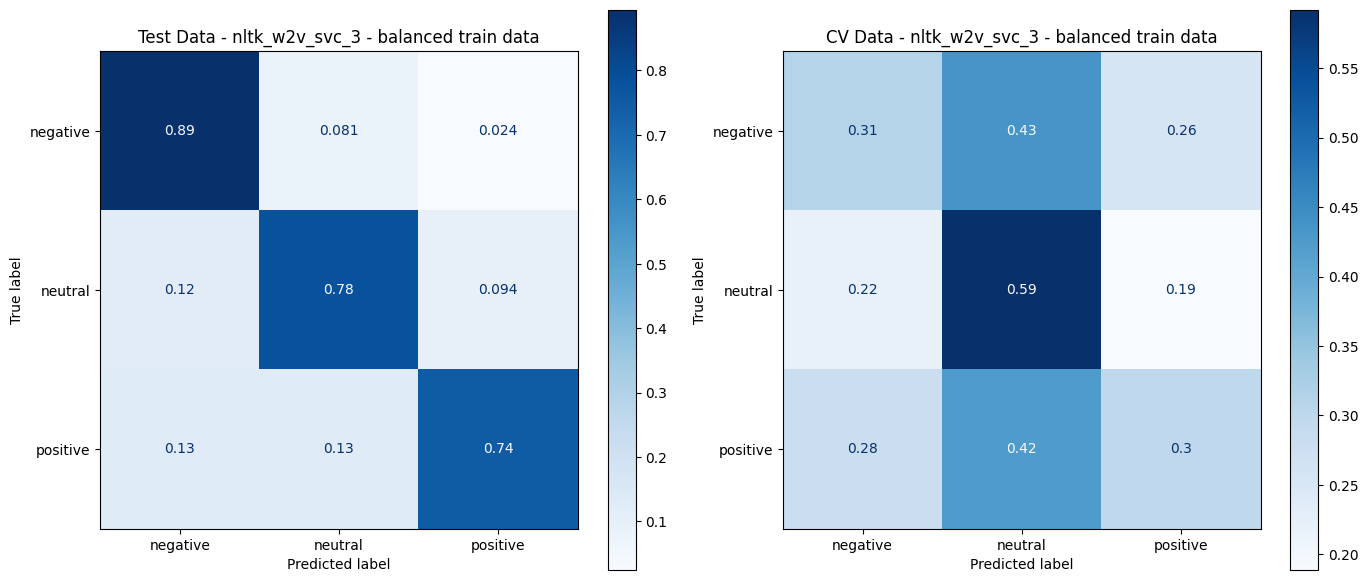

In [12]:
nltk_rf_w2v_model_3.fit(True)
nltk_rf_w2v_model_3.evaluate(True)

In [13]:
nltk_rf_w2v_model_3.dump(config.MODEL_DIR)